# Dispersión de Rutherford

Nesta práctica trataremos de observar como se amoldan os datos experimentais da dispersión de partículas $\alpha$ ao traspasaren unha lámina de ouro e outra de aluminio á teoría de Rutherford:

$$N(\theta)=N_0c_Fd_F\frac{Z^2e^4}{(8\pi\epsilon_0E_\alpha)^2}\frac{1}{sen^4(\theta/2)}$$

Aquí, temos $N_0$ sendo o máximo de partículas dispersadas á altura á que situaremos as correspondentes láminas.
$d_F$ representando o grosor da lámina.
$c_F$ sendo a concentración de átomos no material.

`Pregunta!!!! é $N_d(\theta)$ ou $Nd\theta$?? ou son cousas diferentes? porque se non son o mesmo entón non entendo o da conversión do ángulo sólido`


In [19]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 12 12:35:40 2021

@author: ritav
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #para axustar a unha distribución normal
import scipy.optimize as so

## Fondo

Sen branco nin fonte; sen facer baleiro.

Temos 0 medidas no fondo recollidas ao longo de 2 minutos. Isto deberase a que a radiación $\gamma$ do ambiente é baixísima e a radiación $\alpha$ que poida haber queda absorbida polos centímetros de aire. 

No caso de facer esta medida unha vez realizado o baleiro, as contas dispáranse (experiencia realizada no laboratorio para mellor comprensión do fenómeno).

## Ángulo de non dispersión e $N_0$

Para isto usamos as medidas tomadas para o perfil do feixe (non teñen moito xeito). Deberían seguir unha distribución gaussiana como se amosa a continuación:



 m=-0.0114 ; s=0.0624


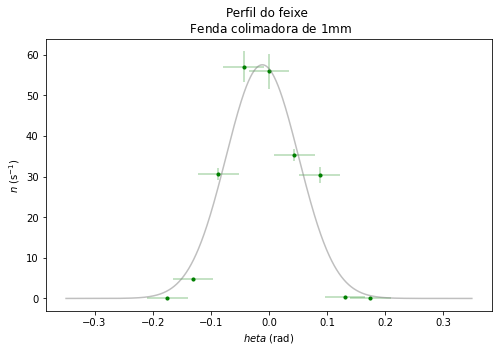

In [70]:
def G(T, m, s):
    G=9/(np.sqrt(2*np.pi)*s)*np.e**(-(T-m)**2/(2*s**2))
    return G

T=np.linspace(-(np.pi/180)*20, (np.pi/180)*20, 1000)
Gauss=G(T,0,1)


xperfil=(np.pi/180)*np.array([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
nperfil=np.array([0.027777778, 4.691666667, 30.60606061, 57.04761905, 55.94444444, 35.32142857, 30.42424242, 0.462184874, 0])
snperfil=np.array([0.012424097, 0.20368026, 1.507143109, 3.774556239, 4.266320371, 1.500016513, 1.935958136, 0.06250981, 0])

fig1=plt.subplots(1, 1, figsize=(8,5))
plt.plot(xperfil,nperfil,'g.')
coef=so.curve_fit(G, xperfil, nperfil)
yfit=G(T,coef[0][0],coef[0][1])
plt.plot(T, yfit, color= 'grey', ls='-', alpha=0.5)
plt.xlabel(u'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(u'$n$ $\mathrm{(s^{-1})}$')
plt.errorbar(xperfil, nperfil, yerr=snperfil, xerr=np.pi/90, fmt="g.", alpha=0.3)

plt.title(u'Perfil do feixe \n Fenda colimadora de $1\mathrm{mm}$')

print(' m=%.4f ; s=%.4f' % (coef[0][0],coef[0][1]))

Os datos non se axustan de todo mal ao modelo gaussiano (sobre todo cando consideramos as incertezas experimentais), polo que agora tomaremos a curva de axuste como referencia. Esta curva é simétrica respecto do seu punto máximo, que nos indicará tanto o ángulo de non dispersión como o parámetro $N_0$ que precisamos para o cálculo da dispersión de Rutherford.

In [23]:
print('N_0=',np.max(yfit))
print(u'O ángulo de non dispersión é', T[np.where(yfit==np.max(yfit))]*180/np.pi, 'graos', '=', T[np.where(yfit==np.max(yfit))], 'rad')


N_0= 57.51499488483361
O ángulo de non dispersión é [-0.66066066] graos = [-0.0115307] rad


Polo tanto, temos que substraer de todas as coordenadas angulares este parámetro $\theta_0=0.82582583\degree$.

## Dispersión de Rutherford

Agora graficaremos o número de contas en cada un dos casos con branco, en función do ángulo do detector respecto do branco e a fonte. Esperamos obter algo similar á dispersión de Rutherford.

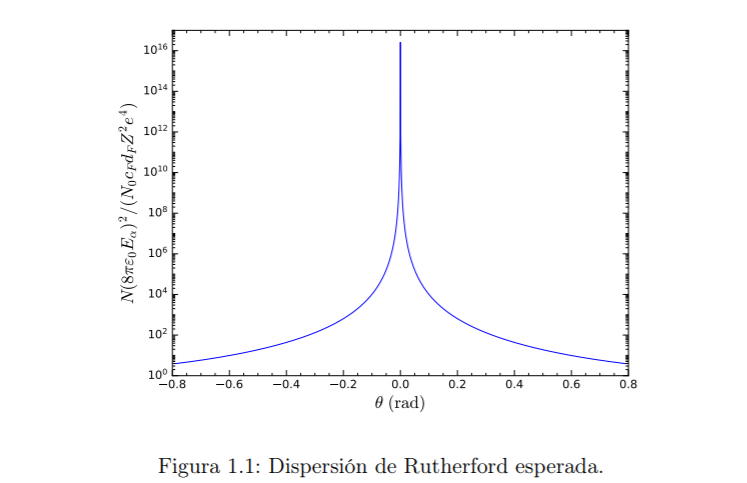
(esta gráfica é da memoria de Javi Mariño do ano pasado, igual habería que facer unha gráfica nova ou simplement poñelo en bibliografía)


Nembargantes, a fórmula de dispersión de Rutherford presentada ao principio refírese a unha distribución espacial (tridimensional), mentres que nós só estamos a recoller os datos no plano do detector. Por tanto, temos que usar a relación do ángulo sólido $d\Omega=2\pisin(\theta)d\theta$ para extrapolar os resultados aplicables ao caso tridimensional. Entón aplicaremos aos nosos datos a seguinte conversión:

$$N(\theta)=2\pi sen(\theta)N_d(\theta)$$

Ademais, trataremos por separado os datos dos lados positivo e negativo do eixe x.

### Presentación dos datos recollidos

A continuación representamos os datos recollidos para cada un dos escenarios, e posteriormente faremos a conversión entre eles e conseguiremos os resultados experimentais buscados nesta práctica.

In [72]:
def N(t,A):
    N=A/((np.sin(t/2))**4)
    return N

In [ ]:
xOURO5neg=(np.pi/180)*np.array([-25, -20, -15, -10, -7.5, -5])-0.01441338
nOURO5neg=np.array([1.322222222, 6.533333333, 21.925, 66.83333333, 89.6, 99.51724138])
snOURO5neg=snORO5=np.array([0.056797597, 0.013355876, 0.01643606, 0.041756122, 0.041716462, 0.043143818])
Tneg=np.linspace(-25*np.pi/180, 0.0001, 500)

xOURO5pos=np.pi/180*np.array([5, 7.5, 10, 15, 20, 25])-0.01441338
nOURO5pos=np.array([92.37931034, 76.4, 55.53333333, 21.2, 3.844444444, 1.338888889])
snOURO5pos=np.array([0.043143818, 0.043150295, 0.041735139, 0.041796169, 0.021705091, 0.016493227])
Tpos=np.linspace(0.0001, 25/180*np.pi, 500)

fORO5, axsORO5 = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xOURO5neg,nOURO5neg,'g.')
coefOURO5neg=so.curve_fit(N, xOURO5neg, nOURO5neg)
yfitOURO5neg=N(Tneg,coefOURO5neg[0][0])
plt.plot(Tneg, yfitOURO5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO5neg, nOURO5neg, yerr=snOURO5neg, fmt="g.", alpha=0.3)


plt.plot(xOURO5pos,nOURO5pos,'g.')
coefOURO5pos=so.curve_fit(N, xOURO5pos, nOURO5pos)
yfitOURO5pos=N(Tpos,coefOURO5pos[0][0])
plt.plot(Tpos, yfitOURO5pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO5pos, nOURO5pos, yerr=snOURO5pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()


plt.subplot(1, 2, 2)

plt.plot(xOURO5neg,nOURO5neg,'g.')
coefOURO5neg=so.curve_fit(N, xOURO5neg, nOURO5neg)
yfitOURO5neg=N(Tneg,coefOURO5neg[0][0])
plt.plot(Tneg, yfitOURO5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO5neg, nOURO5neg, yerr=snOURO5neg, fmt="g.", alpha=0.3)

plt.plot(xOURO5pos,nOURO5pos,'g.')
coefOURO5pos=so.curve_fit(N, xOURO5pos, nOURO5pos)
yfitOURO5pos=N(Tpos,coefOURO5pos[0][0])
plt.errorbar(xOURO5pos, nOURO5pos, yerr=snOURO5pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitOURO5pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0,100)
plt.title(u'Escala linear')

#print( 'Aneg=%.9f' % coefOURO5neg[0][0])
#print( 'Apos=%.9f' % coefOURO5pos[0][0])


Text(0.5, 1.0, 'Escala linear')

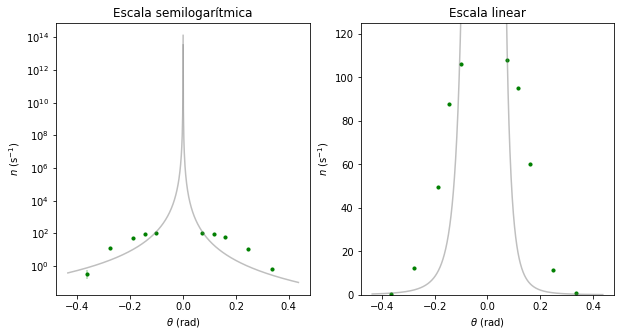

In [26]:
xAL5neg=(np.pi/180)*np.array([-20, -15, -10, -7.5, -5])-0.01441338
nAL5neg=np.array([0.341666667, 12.14, 49.71666667, 87.6, 106])
snAL5neg=np.array([0.188997795, 0.010708833, 0.020994539, 0.04171876, 0.041702251])

xAL5pos=(np.pi/180)*np.array([5, 7.5, 10, 15, 20])-0.01441338
nAL5pos=np.array([108.0666667, 95.03333333, 60.25, 11.48666667, 0.629166667])
snAL5pos=np.array([0.041700904, 0.041710933, 0.020943234, 0.010953133, 0.102727703])


fAL5, axsAL5 = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xAL5neg,nAL5neg,'g.')
coefAL5neg=so.curve_fit(N, xAL5neg, nAL5neg)
yfitAL5neg=N(Tneg,coefAL5neg[0][0])
plt.plot(Tneg, yfitAL5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL5neg, nAL5neg, yerr=snAL5neg, fmt="g.", alpha=0.3)

plt.plot(xAL5pos,nAL5pos,'g.')
coefAL5pos=so.curve_fit(N, xAL5pos, nAL5pos)
yfitAL5pos=N(Tpos,coefAL5pos[0][0])
plt.plot(Tpos, yfitAL5pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL5pos, nAL5pos, yerr=snAL5pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()


plt.subplot(1, 2, 2)

plt.plot(xAL5neg,nAL5neg,'g.')
coefAL5neg=so.curve_fit(N, xAL5neg, nAL5neg)
yfitAL5neg=N(Tneg,coefAL5neg[0][0])
plt.plot(Tneg, yfitAL5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL5neg, nAL5neg, yerr=snAL5neg, fmt="g.", alpha=0.3)

plt.plot(xAL5pos,nAL5pos,'g.')
coefAL5pos=so.curve_fit(N, xAL5pos, nAL5pos)
yfitAL5pos=N(Tpos,coefAL5pos[0][0])
plt.errorbar(xAL5pos, nAL5pos, yerr=snAL5pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitAL5pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0,125)
plt.title(u'Escala linear')

#print( 'Aneg=%.9f' % coefAL5neg[0][0])
#print( 'Apos=%.9f' % coefAL5pos[0][0])


Text(0.5, 1.0, 'Escala linear')

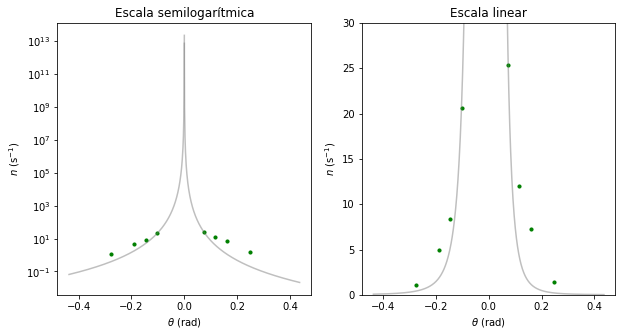

In [27]:
xOURO1neg=(np.pi/180)*np.array([-15, -10, -7.5, -5])-0.01441338
nOURO1neg=np.array([1.111111111, 4.916666667, 8.34, 20.66666667])
snOURO1neg=np.array([0.067440532, 0.021289328, 0.017321082, 0.021749704])

xOURO1pos=(np.pi/180)*np.array([5, 7.5, 10, 15])-0.01441338
nOURO1pos=np.array([25.4, 11.99, 7.283333333, 1.444444444])
snOURO1pos=np.array([0.021444374, 0.015026987, 0.016297254, 0.052066757])


fOURO1, axsOURO1 = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xOURO1neg,nOURO1neg,'g.')
coefOURO1neg=so.curve_fit(N, xOURO1neg, nOURO1neg)
yfitOURO1neg=N(Tneg,coefOURO1neg[0][0])
plt.plot(Tneg, yfitOURO1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO1neg, nOURO1neg, yerr=snOURO1neg, fmt="g.", alpha=0.3)


plt.plot(xOURO1pos,nOURO1pos,'g.')
coefOURO1pos=so.curve_fit(N, xOURO1pos, nOURO1pos)
yfitOURO1pos=N(Tpos,coefOURO1pos[0][0])
plt.plot(Tpos, yfitOURO1pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO1pos, nOURO1pos, yerr=snOURO1pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()


plt.subplot(1, 2, 2)

plt.plot(xOURO1neg,nOURO1neg,'g.')
coefOURO1neg=so.curve_fit(N, xOURO1neg, nOURO1neg)
yfitOURO1neg=N(Tneg,coefOURO1neg[0][0])
plt.plot(Tneg, yfitOURO1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO1neg, nOURO1neg, yerr=snOURO1neg, fmt="g.", alpha=0.3)

plt.plot(xOURO1pos,nOURO1pos,'g.')
coefOURO1pos=so.curve_fit(N, xOURO1pos, nOURO1pos)
yfitOURO1pos=N(Tpos,coefOURO1pos[0][0])
plt.errorbar(xOURO1pos, nOURO1pos, yerr=snOURO1pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitOURO1pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0,30)
plt.title(u'Escala linear')

#print( 'Aneg=%.9f' % coefOURO5neg[0][0])
#print( 'Apos=%.9f' % coefOURO5pos[0][0])

Text(0.5, 1.0, 'Escala linear')

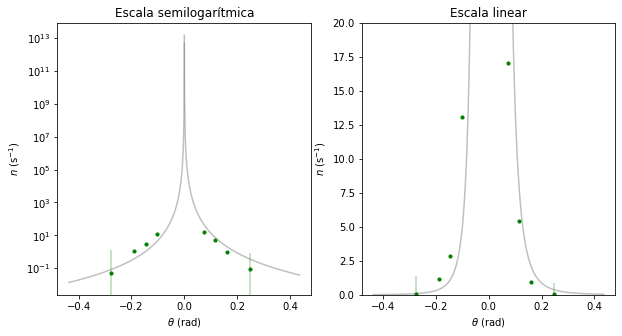

In [28]:
xAL1pos=(np.pi/180)*np.array([-15, -10, -7.5, -5])-0.01441338
nAL1pos=np.array([0.055555556, 1.147619048, 2.833333333, 13.06666667])
snAL1pos=np.array([1.341658759, 0.060424093, 0.023370021, 0.016061702])

xAL1neg=(np.pi/180)*np.array([ 5, 7.5, 10, 15])-0.01441338
nAL1neg=np.array([ 17.08888889, 5.4125, 0.966666667, 0.095])
snAL1neg=np.array([0.015197008, 0.013013735, 0.071633826, 0.744349167])



fAL1, axsAL1 = plt.subplots(2,2,figsize=(10,5))


plt.subplot(1, 2, 1)

plt.plot(xAL1neg,nAL1neg,'g.')
coefAL1neg=so.curve_fit(N, xAL1neg, nAL1neg)
yfitAL1neg=N(Tneg,coefAL1neg[0][0])
plt.plot(Tneg, yfitAL1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL1neg, nAL1neg, yerr=snAL1neg, fmt="g.", alpha=0.3)

plt.plot(xAL1pos,nAL1pos,'g.')
coefAL1pos=so.curve_fit(N, xAL1pos, nAL1pos)
yfitAL1pos=N(Tpos,coefAL1pos[0][0])
plt.plot(Tpos, yfitAL1pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL1pos, nAL1pos, yerr=snAL1pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()


plt.subplot(1, 2, 2)

plt.plot(xAL1neg,nAL1neg,'g.')
coefAL1neg=so.curve_fit(N, xAL1neg, nAL1neg)
yfitAL1neg=N(Tneg,coefAL1neg[0][0])
plt.plot(Tneg, yfitAL1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL1neg, nAL1neg, yerr=snAL1neg, fmt="g.", alpha=0.3)

plt.plot(xAL1pos,nAL1pos,'g.')
coefAL1pos=so.curve_fit(N, xAL1pos, nAL1pos)
yfitAL1pos=N(Tpos,coefAL1pos[0][0])
plt.errorbar(xAL1pos, nAL1pos, yerr=snAL1pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitAL1pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0,20)
plt.title(u'Escala linear')

#print( 'Aneg=%.9f' % coefAL1neg[0][0])
#print( 'Apos=%.9f' % coefAL1pos[0][0])

### Conversión entre fendas

Comprobamos que os datos non seguen un comportamento perfectamente análogo ao esperado, pero (sobre todo no caso da fenda de $1\mathrm{mm}$, que ten mair precisión angular) non quedan tan distantes tampouco. Agora o que faremos con estes datos recollidos será buscar un factor de conversión entre ambas fendas, para poder aproveitar a precisión angular da fenda máis fina pero sen perder a incerteza máis reducida da fenda grande (polo maior número de contas; idealmente poderiamos realizar todo o experimento coa fenda fina dándolle tempo abondo para chegar a un número de contas que nos proporcionase unha incerteza máis aceptable, pero isto resulta imposible dadas as nosas limitacións de equipo e tempo). 

Daquela, buscamos un factor de conversión entre as contas da forma $\displaystyle k=\frac{n_{5mm}}{n_{1mm}}$ de xeito que teremos as contas renormalizadas: $\displaystyle n_{1mm}=\frac{n_{5mm}}{k}$. Isto aplicámolo ángulo a ángulo para aqueles $\theta>5\degree$ (xa que para ángulos pequenos temos unha diverxencia na dispersión de Rutherford e os datos non son os máis fiables). Obviamente, buscaremos un factor de proporcionalidade para cada material e tamén para os ángulos positivos e negativos separadamente. Obtemos:

$$k_{Au -}=14.7\pm2.2 \hspace{5mm}k_{Au +}=9.6\pm2.2$$
$$k_{Al -}=162\pm58 \hspace{5mm}k_{Al +}=98\pm26$$

### Comprobación da dispersión de Rutherford para os novos datos

AOUROneg=0.000054180
AOUROpos=0.000019141


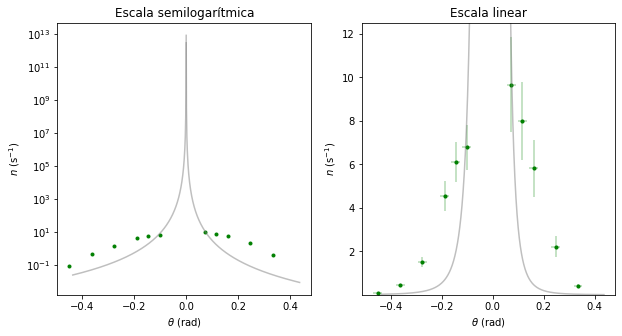

In [50]:
xOUROneg=np.pi/180*np.array([-25, -20, -15, -10, -7.5, -5])-0.01441338
nOUROneg=np.array([0.090010106, 0.444755818, 1.492541526, 4.549670483, 6.099508358, 6.774623276])
snOUROneg=np.array([0.014227995, 0.067663448, 0.227051812, 0.692112801, 0.927876425, 1.030576391])


xOUROpos=np.pi/180*np.array([5, 7.5, 10, 15, 20])-0.01441338
nOUROpos=np.array([9.665259988, 7.993411732, 5.810219871, 2.21806713, 0.402228106])
snOUROpos=np.array([2.181511161, 1.804165709, 1.311408368, 0.500636054, 0.090801667])



fOURO, axsOURO = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xOUROneg,nOUROneg,'g.')
coefOUROneg=so.curve_fit(N, xOUROneg, nOUROneg)
yfitOUROneg=N(Tneg,coefOUROneg[0][0])
plt.plot(Tneg, yfitOUROneg, color='grey', ls='-', alpha=0.5)
#plt.errorbar(xOUROneg, nOUROneg, xerr=np.pi/180, yerr=snOUROneg, fmt="g.", alpha=0.3)

plt.plot(xOUROpos,nOUROpos,'g.')
coefOUROpos=so.curve_fit(N, xOUROpos, nOUROpos)
yfitOUROpos=N(Tpos,coefOUROpos[0][0])
plt.plot(Tpos, yfitOUROpos, color='grey', ls='-', alpha=0.5)
#plt.errorbar(xOUROpos, nOUROpos, xerr=np.pi/180, yerr=snOUROpos, fmt="g.", alpha=0.3)
plt.semilogy()

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')



plt.subplot(1, 2, 2)

plt.plot(xOUROneg,nOUROneg,'g.')
coefOUROneg=so.curve_fit(N, xOUROneg, nOUROneg)
yfitOUROneg=N(Tneg,coefOUROneg[0][0])
plt.plot(Tneg, yfitOUROneg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOUROneg, nOUROneg, xerr=np.pi/180, yerr=snOUROneg, fmt="g.", alpha=0.3)

plt.plot(xOUROpos,nOUROpos,'g.')
coefOUROpos=so.curve_fit(N, xOUROpos, nOUROpos)
yfitOUROpos=N(Tpos,coefOUROpos[0][0])
plt.errorbar(xOUROpos, nOUROpos, xerr=np.pi/180, yerr=snOUROpos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitOUROpos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0.0001,12.5)
plt.title(u'Escala linear')



print( 'AOUROneg=%.9f' % coefOUROneg[0][0])
print( 'AOUROpos=%.9f' % coefOUROpos[0][0])


AALneg=0.000005096
AALpos=0.000002188


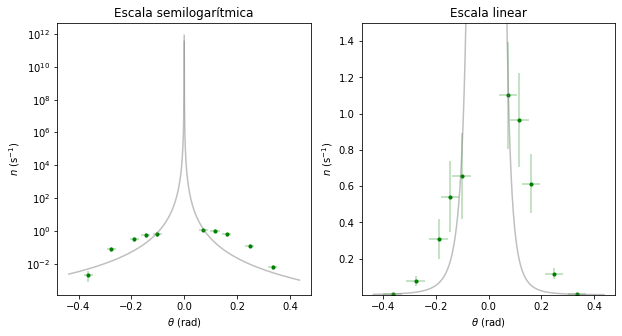

In [63]:
xALneg=np.pi/180*np.array([-20, -15, -10, -7.5, -5])-0.01441338
nALneg=np.array([0.002115539, 0.07516872, 0.307836756, 0.542403616, 0.656333143])
snALneg=np.array([0.001396171, 0.02705627, 0.110802671, 0.195232634, 0.236240337])

xALpos=np.pi/180*np.array([5, 7.5, 10, 15, 20])-0.01441338
nALpos=np.array([1.100021008, 0.967353453, 0.613290553, 0.116923886, 0.006404348])
snALpos=np.array([0.294800926, 0.259246667, 0.164359213, 0.031335267, 0.002009788])


fAL, axsAL = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xALneg,nALneg,'g.')
coefALneg=so.curve_fit(N, xALneg, nALneg)
yfitALneg=N(Tneg,coefALneg[0][0])
plt.plot(Tneg, yfitALneg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xALneg, nALneg, xerr=np.pi/180, yerr=snALneg, fmt="g.", alpha=0.3)

plt.plot(xALpos,nALpos,'g.')
coefALpos=so.curve_fit(N, xALpos, nALpos)
yfitALpos=N(Tpos,coefALpos[0][0])
plt.plot(Tpos, yfitALpos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xALpos, nALpos, xerr=np.pi/180, yerr=snALpos, fmt="g.", alpha=0.3)
plt.semilogy()

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')



plt.subplot(1, 2, 2)

plt.plot(xALneg,nALneg,'g.')
coefALneg=so.curve_fit(N, xALneg, nALneg)
yfitALneg=N(Tneg,coefALneg[0][0])
plt.plot(Tneg, yfitALneg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xALneg, nALneg, xerr=2*np.pi/180, yerr=snALneg, fmt="g.", alpha=0.3)

plt.plot(xALpos,nALpos,'g.')
coefALPos=so.curve_fit(N, xALpos, nALpos)
yfitALpos=N(Tpos,coefALpos[0][0])
plt.errorbar(xALpos, nALpos, xerr=np.pi/180, yerr=snALpos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitALpos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0.0001,1.5)
plt.title(u'Escala linear')

plt.savefig('sample')



print( 'AALneg=%.9f' % coefALneg[0][0])
print( 'AALpos=%.9f' % coefALpos[0][0])

`queda regular`

Quedarianos agora comparar estes resultados co $A$ teórico: $$\displaystyle A=N_0c_Fd_F\frac{Z^2e^4}{(8\pi\epsilon_0E_\alpha)^2}$$

Tomamos como valores $N_0$ indicado anteriormente:

- $c_F=\frac{N\rho}{A}$, $A$ sendo o peso atómico

- $d_F=2.5, 8\hspace{1mm}\mathrm{\mu m}$ para $Au$ e $Al$ respectivamente

- $Z(Au)=79$
- $E_\alpha\approx4.5\mathrm{MeV}$ (segundo se proporciona no guión da práctica, aínda que a radiación $\alpha$ emitida polo Americio 241 ten unha enerxía media de $5.5\mathrm{Mev}$, ao saír do encapsulamento da mostra as partículas quedan cunha enerxía máis preto do outro valor proporcionado).

Podemos calculalo para o caso do ouro:

In [62]:
A=57.51499488483361*6.022*10**23*19.3/197*2.5*(79/(8*np.pi*8.85*10**(-12)*4.5*10**6))**2*1.602**2*10**(-38)
print(r'A_{ouro}=', A)
print(coefOUROneg[0][0], coefOUROpos[0][0])

A_{ouro}= 0.001356253418822156
5.4180405329746004e-05 1.914119589110915e-05


`Teño unha discrepancia de 2 ordes de magnitude`

# Cálculo do Z do aluminio

Valerémonos da relación entre as contas para o ouro e o aluminio $\displaystyle \frac{N_{Au}}{N_{Al}}=\frac{c_{Au}d_{Au}Z_{Au}^2}{c_{Al}d_{Al}Z_{Al}^2}$ para obter o Z do aluminio do seguinte xeito:

$$Z_{Al}=\sqrt{\frac{N_{Al}(\theta)c_{Au}d_{Au}}{N_{Au}(\theta)c_{Al}d_{Al}}}Z_{Au}$$

In [68]:
Zalneg=np.zeros(5)
Zalpos=np.zeros(5)

for i in range(len(nALneg)):
    Zalneg[i]=np.sqrt(nALneg[i]*19.3/2.7*26.98/197*2.5/8)*79
    
for i in range(len(nALpos)):
    Zalpos[i]=np.sqrt(nALpos[i]*19.3/2.7*26.98/197*2.5/8)*79
    
    
Zal=np.concatenate((Zalneg,Zalpos), axis=None)

Z_Al=np.mean(Zal)

print(Z_Al)
    

24.727618214629565


`Tiña que quedar 13.........`